<a href="https://colab.research.google.com/github/apk-bumble/ml-code-open/blob/main/mfml-assignment2-q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q3) Given the function f(x) = (x^2 * cos(x) + sin(x) - x), derive the variable
step size (γ) that will ensure faster convergence of the gradient descent
method and compare the results with

i) constant step size

ii) decaying step size using various values of α0 and k

iii) Bold driver algorith

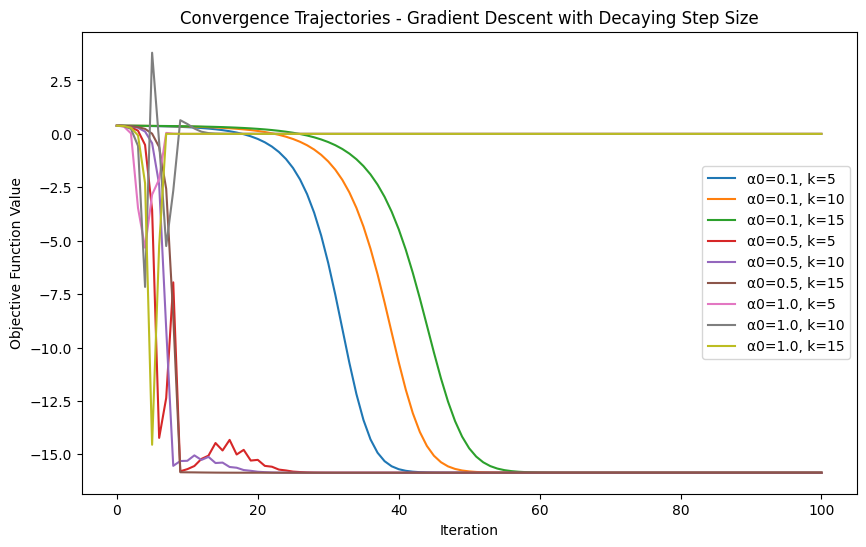

Constant Step Size:
Optimal Solution: x = 3.7338602089045865
Objective Function Value: -15.85922134565263

Decaying Step Size:
Optimal Solution: x = 3.7466959145161733
Objective Function Value: -15.860781007884443

Bold Driver Algorithm:
Optimal Solution: x = 3.759813094960683
Objective Function Value: -15.859141565894511



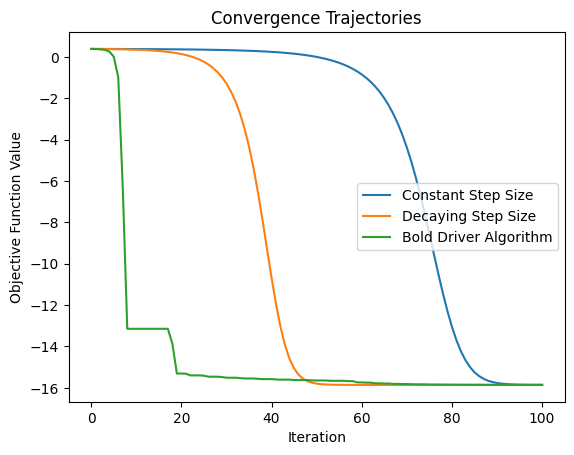

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function: f(x) = (x^2 * cos(x) + sin(x) - x)
def objective_function(x):
    return x**2 * np.cos(x) + np.sin(x) - x

# Define the derivative of the objective function
def derivative_objective_function(x):
    return 2*x*np.cos(x) - x**2*np.sin(x) + np.cos(x) - 1

# Gradient Descent method with constant step size
def gradient_descent_constant_step(x0, learning_rate, max_iterations):
    x = x0
    trajectory = [x]
    for _ in range(max_iterations):
        gradient = derivative_objective_function(x)
        x = x - learning_rate * gradient
        trajectory.append(x)
    return x, trajectory

# Gradient Descent method with decaying step size
def gradient_descent_decaying_step(x0, alpha, k, max_iterations):
    x = x0
    trajectory = [x]
    for i in range(max_iterations):
        gradient = derivative_objective_function(x)
        learning_rate = alpha / np.sqrt(i + k)
        x = x - learning_rate * gradient
        trajectory.append(x)
    return x, trajectory

# Set initial parameters
x0 = 1.0
alpha_values = [0.1, 0.5, 1.0]  # Various values of α0
k_values = [5, 10, 15]  # Various values of k
max_iterations = 100

# Plot the convergence trajectories for different α0 and k
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    for k in k_values:
        _, trajectory = gradient_descent_decaying_step(x0, alpha, k, max_iterations)
        iterations = np.arange(len(trajectory))
        plt.plot(iterations, [objective_function(x) for x in trajectory], label=f'α0={alpha}, k={k}')

plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Trajectories - Gradient Descent with Decaying Step Size')
plt.legend()
plt.show()

# Gradient Descent method with Bold driver algorithm
def gradient_descent_bold_driver(x0, alpha, beta, max_iterations):
    x = x0
    trajectory = [x]
    learning_rate = alpha
    for _ in range(max_iterations):
        gradient = derivative_objective_function(x)
        x_new = x - learning_rate * gradient
        if objective_function(x_new) < objective_function(x):
            x = x_new
            learning_rate = learning_rate * beta
        else:
            learning_rate = learning_rate / beta
        trajectory.append(x)
    return x, trajectory

# Set initial parameters
x0 = 1.0
learning_rate_constant = 0.01
alpha_decaying = 0.1
k_decaying = 10
alpha_bold = 0.1
beta_bold = 1.1
max_iterations = 100

# Run Gradient Descent with constant step size
x_constant, trajectory_constant = gradient_descent_constant_step(x0, learning_rate_constant, max_iterations)

# Run Gradient Descent with decaying step size
x_decaying, trajectory_decaying = gradient_descent_decaying_step(x0, alpha_decaying, k_decaying, max_iterations)

# Run Gradient Descent with Bold driver algorithm
x_bold, trajectory_bold = gradient_descent_bold_driver(x0, alpha_bold, beta_bold, max_iterations)

# Print the results
print("Constant Step Size:")
print("Optimal Solution: x =", x_constant)
print("Objective Function Value:", objective_function(x_constant))
print()

print("Decaying Step Size:")
print("Optimal Solution: x =", x_decaying)
print("Objective Function Value:", objective_function(x_decaying))
print()

print("Bold Driver Algorithm:")
print("Optimal Solution: x =", x_bold)
print("Objective Function Value:", objective_function(x_bold))
print()

# Plot the convergence trajectories
iterations = np.arange(max_iterations + 1)

plt.plot(iterations, [objective_function(x) for x in trajectory_constant], label='Constant Step Size')
plt.plot(iterations, [objective_function(x) for x in trajectory_decaying], label='Decaying Step Size')
plt.plot(iterations, [objective_function(x) for x in trajectory_bold], label='Bold Driver Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Trajectories')
plt.legend()
plt.show()